<a href="https://colab.research.google.com/github/MateoUsme/Esp_Analitica/blob/main/Taller_3_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


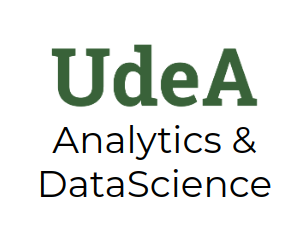

In [2]:
Image("local/imgs/udea-datascience.png")

# **Exploración de Datos - Taller 3**
## Universidad de Antioquia

### Estudiantes:

- 

## Leer una base de datos

Para este taller utilizaremos un conjunto de datos del mundo real; este corresponde a un análisis de manuscritos antiguos de la Biblia, en el cual se ha identificado la participación de 12 copistas diferentes.
Dichos datos ya se han normalizado, utilizando el metodo de normalización Z. Revise la información adicional y la descripción del dataset disponble en: https://archive.ics.uci.edu/ml/datasets/Avila

**Sin embargo, no utilizaremos los archivos originales del repositorio, sino unas versiones modificadas (con fines prácticos para el taller) que estarán disponibles para el desarrollo del taller: *avila-tr-modified.csv* y *avila-ts-modified.csv***


In [75]:
!pip -q install sweetviz

import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as svz
import scipy.stats as sts
import scipy.special as spcl
import matplotlib.pyplot as plt

In [76]:
avila_tr_mod_url = "https://drive.google.com/uc?export=download&id=1cHJuI7eZyE6hU1EvLu3xKQ3UgBBGDTry"
avila_ts_mod_url = "https://drive.google.com/uc?export=download&id=1BUOi1v7dGv0Jx4ZM5WstxT6awfz-acCs"

In [77]:
data_tr = pd.read_excel(avila_tr_mod_url) # Read data
data_tr

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,NaN,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,NaN,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,NaN,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [78]:
data_ts = pd.read_excel(avila_ts_mod_url) # Read data
data_ts

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,NaN,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,NaN,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,NaN,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,NaN,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


## Exploración de Datos Inicial

Una vez cargado los archivos avila_tr_modified.xlsx y avila_ts_modified.xlsx,  realice una breve exploración de ambas bases de datos.

¿Hay datos nulos o faltantes? ¿Cuál es el porcentaje de datos nulos o faltantes?

In [136]:
data_tr.isna().sum()

F1 intercolumnar distance                538
F2 upper margin                          536
F3 lower margin                          509
F4 exploitation                          507
F5 row number                            516
F6 modular ratio                         504
F7 interlinear spacing                   490
F8 weight                                565
F9 peak number                           514
F10 modular ratio/interlinear spacing    536
clases                                     0
dtype: int64

In [80]:
for col in data_tr.columns:
  print(len(data_tr[col].unique()))

145
209
232
751
49
227
229
9576
262
9475
12


In [109]:
from sklearn.impute import MissingIndicator
import numpy as np

valores_faltantes = MissingIndicator(missing_values = np.nan) 
valores_faltantes.fit(data_tr)
total_vf = valores_faltantes.transform(data_tr)

valores_faltantes.features_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [115]:
print("Porcentaje de Datos Faltantes (%): ",100*(len(np.where(total_vf == True)[0])/(data_tr.shape[0]*data_tr.shape[1])))

Porcentaje de Datos Faltantes (%):  4.545454545454546


## Exploración de Datos Exhaustiva



Realice una exploración exhaustiva de la base de datos y responda las siguientes preguntas:

¿Cuales columnas tienen datos faltantes?

Presente y calcule el porcentaje de los datos faltantes contenidos en nuestra base de datos.


In [117]:
for col in valores_faltantes.features_:
  print(data_tr.columns[col])

F1 intercolumnar distance
F2 upper margin
F3 lower margin
F4 exploitation
F5 row number
F6 modular ratio
F7 interlinear spacing
F8 weight
F9 peak number
F10 modular ratio/interlinear spacing


In [81]:
data_tr.describe()

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing
count,9892.000000,9894.000000,9921.000000,9923.000000,9914.000000,9926.000000,9940.000000,9865.000000,9916.000000,9894.000000
mean,0.001546,0.036306,0.002634,-0.005310,0.007233,0.011181,0.004743,0.013899,0.013354,0.001993
std,0.987086,4.019557,1.124072,1.007372,0.992470,1.132249,1.328194,1.002868,1.093308,1.002932
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.044076,-0.537749,-0.372457,-0.516878
50%,0.043885,-0.055704,0.217845,0.089437,0.261718,-0.058835,0.220177,0.116084,0.064084,-0.036816
75%,0.204355,0.203385,0.352988,0.655644,0.261718,0.564038,0.446679,0.654959,0.500624,0.533989
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


## Imputación de Datos



De los métodos enseñados en clase, escoja el método de imputación de datos mas adecuado y justifique su elección. 

In [174]:
data_tr = data_tr.sort_values(by="clases").reset_index()
data_tr_numerica = data_tr.loc[:,data_tr.columns[0]:data_tr.columns[-2]].copy()
columnas = data_tr_numerica.columns
col_clases = data_tr.clases
data_tr_numerica


,level_0,index,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing
0,0,0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,2850,6986,-0.314087,-2.426761,-0.006209,-0.194681,0.261718,2.100457,0.446679,-0.892527,-0.185368,1.737085
2,2851,6875,0.154980,-0.471816,0.509470,1.205082,0.261718,1.062336,0.408929,0.201123,-0.185368,0.834674
3,2852,6980,NaN,-0.110662,0.409890,1.097277,0.261718,1.353010,0.786433,-0.181904,-0.247731,0.862992
4,2853,6916,0.364825,-0.149918,0.107596,-1.108143,0.172340,-0.391033,0.220177,1.961441,0.500624,-0.345222
...,...,...,...,...,...,...,...,...,...,...,...,...
10425,10258,8518,-0.635027,NaN,0.299642,1.407861,0.172340,0.730137,-0.912336,0.948093,2.870416,1.426123
10426,10259,5825,-0.128929,0.705861,0.413447,2.004055,0.619230,1.186911,-1.176589,NaN,NaN,2.120920
10427,10260,8162,-0.240024,-0.299090,0.694403,0.955725,0.619230,-0.847807,-1.403091,1.471901,1.685520,0.166711
10428,10246,8184,-0.338774,-0.197025,0.530808,1.146271,0.708609,-0.100360,-1.365341,NaN,-0.029461,0.940024


In [175]:
from sklearn.impute import KNNImputer

knn_imp = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights= "distance")  
knn_imp.fit(data_tr_numerica)
data_tr_2 = knn_imp.transform(data_tr_numerica)
print(data_tr_2.shape)

(10430, 12)


In [176]:
pd.concat([pd.DataFrame(data_tr_2,columns=columnas)]+[data_tr.clases],axis=1)

,level_0,index,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases
0,0.0,0.0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,2850.0,6986.0,-0.314087,-2.426761,-0.006209,-0.194681,0.261718,2.100457,0.446679,-0.892527,-0.185368,1.737085,A
2,2851.0,6875.0,0.154980,-0.471816,0.509470,1.205082,0.261718,1.062336,0.408929,0.201123,-0.185368,0.834674,A
3,2852.0,6980.0,0.000291,-0.110662,0.409890,1.097277,0.261718,1.353010,0.786433,-0.181904,-0.247731,0.862992,A
4,2853.0,6916.0,0.364825,-0.149918,0.107596,-1.108143,0.172340,-0.391033,0.220177,1.961441,0.500624,-0.345222,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10425,10258.0,8518.0,-0.635027,-0.031185,0.299642,1.407861,0.172340,0.730137,-0.912336,0.948093,2.870416,1.426123,Y
10426,10259.0,5825.0,-0.128929,0.705861,0.413447,2.004055,0.619230,1.186911,-1.176589,0.674775,0.939344,2.120920,Y
10427,10260.0,8162.0,-0.240024,-0.299090,0.694403,0.955725,0.619230,-0.847807,-1.403091,1.471901,1.685520,0.166711,Y
10428,10246.0,8184.0,-0.338774,-0.197025,0.530808,1.146271,0.708609,-0.100360,-1.365341,1.008031,-0.029461,0.940024,Y


## Codificación de Variables Categóricas

En este apartado, realizar la codificación de la característica o columna *clases*. Justificar la elección del método de codificación.

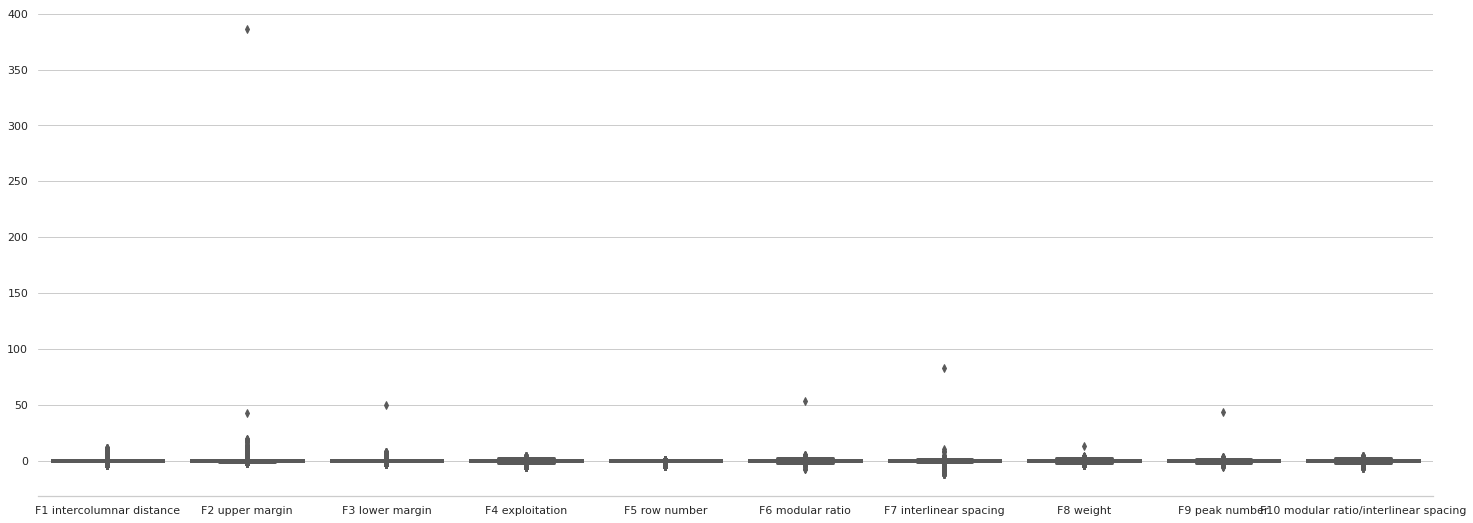

In [82]:
import seaborn as sns # Librería de visualización para data science

sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_tr, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

In [ ]:
data_tr[data_tr["F2 upper margin"]>18]

In [83]:
data_tr.loc[data_tr["F2 upper margin"]>20,"F2 upper margin"] = 19.470188

      F1 intercolumnar distance  ...  clases
4245                  -3.498799  ...       A
6619                   0.000000  ...       A
6946                  -3.498799  ...       A
7176                  -3.498799  ...       A
9402                  -3.498799  ...       A

[5 rows x 11 columns]


In [97]:
data_tr[data_tr["F3 lower margin"]>7]

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases
369,-3.498799,-0.110662,7.419561,2.021451,-4.922215,-0.141884,-0.761334,1.335682,1.404887,0.484039,I
818,-3.498799,-0.063555,7.458681,0.129002,-4.922215,-0.058835,1.088436,-0.828456,-0.341275,-0.480408,W
1798,-3.498799,-0.063555,7.458681,0.129002,-4.922215,0.024215,0.635431,-0.009106,-0.029461,-0.200211,W
1860,-3.498799,-0.110662,7.419561,2.021451,-4.922215,-0.100360,-0.950086,1.138383,0.625350,0.635318,I
3705,-3.498799,-0.063555,7.458681,0.129002,-4.922215,NaN,0.861934,-0.567979,-0.434820,0.692291,W
6323,-3.498799,-0.110662,7.419561,2.021451,-4.922215,-0.598658,-1.176589,2.248439,1.248980,0.266636,I
6619,0.000000,19.470188,50.000000,0.168104,0.000000,53.000000,83.000000,0.275032,44.000000,0.638020,A
7207,-3.498799,-0.063555,7.458681,0.129002,-4.922215,-0.100360,0.031425,-0.378038,0.188810,0.057226,W
10199,-3.498799,-0.063555,7.458681,0.129002,-4.922215,0.148790,0.031425,-1.382921,-1.619716,0.240139,W


In [ ]:
data_tr.loc[data_tr["F3 lower margin"]>20,"F3 lower margin"] = 7.458687

In [102]:
data_tr[data_tr["F6 modular ratio"]>5]

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases
5812,-0.511588,-0.620989,0.491688,-2.053711,-0.006417,5.505495,NaN,-1.684909,-3.895963,4.443329,D
6619,0.000000,19.470188,50.000000,0.168104,0.000000,53.000000,83.000000,0.275032,44.000000,0.638020,A
9252,-0.511588,-0.620989,0.491688,-2.053711,-0.006417,5.007196,0.044008,-1.604276,-2.659098,4.671232,D


In [ ]:
data_tr.loc[data_tr["F6 modular ratio"]>8,"F6 modular ratio"] = 10.714792

In [90]:
data_tr[data_tr["F7 interlinear spacing"]>8]

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases
4584,-0.116585,-0.338346,-3.210528,-0.865829,-1.168333,-7.450257,10.714792,-2.166818,-5.423855,-6.719324,A
4608,0.414200,-0.306942,4.329047,-1.391455,-4.743459,-1.802878,8.902772,1.134344,-4.176596,-3.749217,A
6619,0.000000,19.470188,50.000000,0.168104,0.000000,53.000000,83.000000,0.275032,44.000000,0.638020,A


In [ ]:
data_tr.loc[data_tr["F7 interlinear spacing"]>8,"F7 interlinear spacing"] = 10.714792

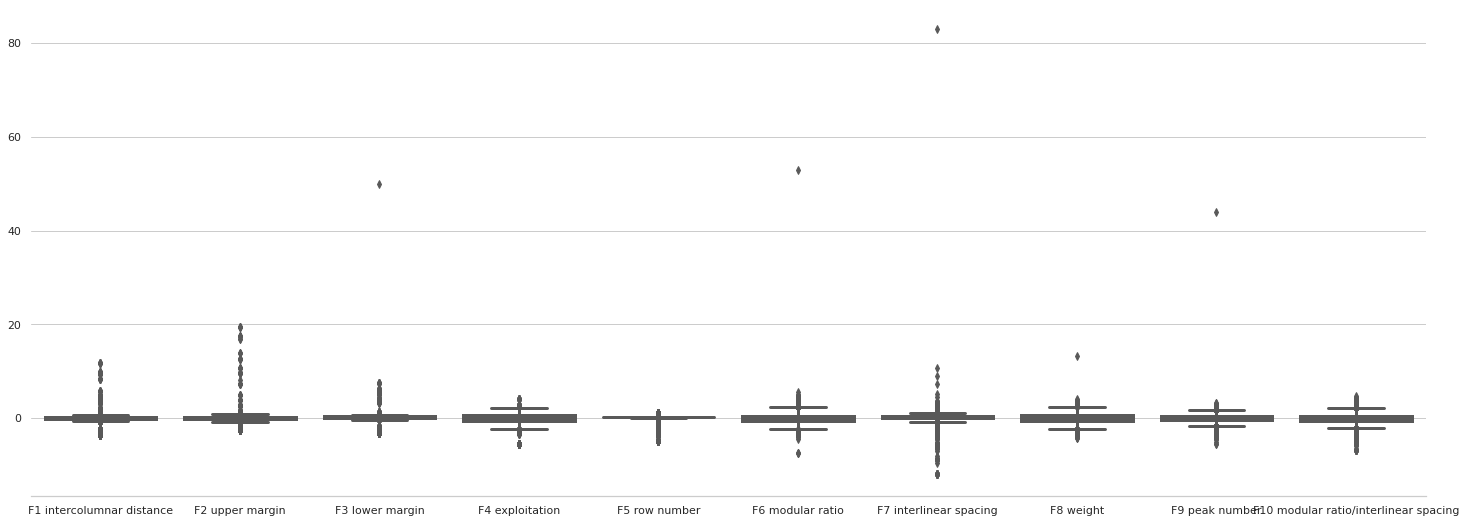

In [84]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_tr, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

## Detección de Datos Atípicos

Presente mediante graficos vistos a lo largo del curso, diagramas que permitan la visualización  de datos atípicos, de una breve explicación de lo mostrado y analice si dentro del contexto del problema se pueden eliminar, justifique. 

## Reducción de Dimensionalidad

Seleccione uno de los algoritmos de reducción de dimensionalidad:

- Presente el tamaño del nuevo conjunto de datos
- Seleccione dos características de los datos reducidos y genere una gráfica de datos esparcidos (scatter plot) 
- Haga un análisis de los resultados del gráfico obtenido

## Conclusiones Generales del Taller

...